In [39]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [41]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [42]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [43]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [44]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)


# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled.set_index('coin_id', inplace=True)


# Display sample data
(df_market_data_scaled.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [45]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [47]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    kmeans.fit(df_market_data_scaled)
    
    inertia_values.append(kmeans.inertia_)

(inertia_values)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[287.0,
 195.82021818036046,
 123.19048183836958,
 79.02243535120975,
 65.302379141625,
 52.88851821977531,
 43.91469044757746,
 37.517032490103574,
 32.485240832183536,
 28.222899290608925,
 24.545512769147678]

In [48]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [49]:
import matplotlib.pyplot as plt


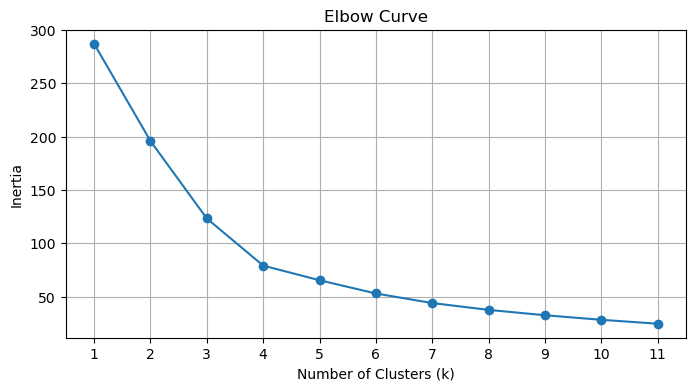

In [50]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  # Ensures all k values are labeled on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The elbow occurs around k=4 that's why the best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [51]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [52]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
(clusters)


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [56]:
# Create a copy of the DataFrame
df_clustered = df_market_data_scaled.copy()
(df_clustered.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [57]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['Cluster'] = clusters


# Display sample data
(df_clustered.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [58]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',  # Color the points based on the cluster
    hover_cols=['coin_id'],  # Add the crypto name to hover_cols
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    height=500,
    width=700
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [59]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [60]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

# View the first five rows of the DataFrame. 
(df_pca.head())


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [61]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"How much information can be attributed to each principal component is: {explained_variance}")


How much information can be attributed to each principal component is: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance=0.3719856+0.34700813+0.17603793=0.89503166
total explained variance of the three principal components is approximately 90%. 

In [62]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index


# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)


# Display sample data
(df_pca.head())


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [63]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [65]:
# Create an empty list to store the inertia values
inertia_pca_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:

    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    

    kmeans_pca.fit(df_pca)
    

    inertia_pca_values.append(kmeans_pca.inertia_)


(inertia_pca_values)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[256.8740855678926,
 165.9019940203601,
 93.77462568057297,
 49.66549665179738,
 37.87874703346251,
 27.618971787957445,
 21.182775862957335,
 17.3898232047689,
 13.593650379876738,
 10.55935756279343,
 8.007418066730596]

In [66]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca_data = {
    'k': k_values,
    'inertia': inertia_pca_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_pca_data)
(df_elbow_pca)


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


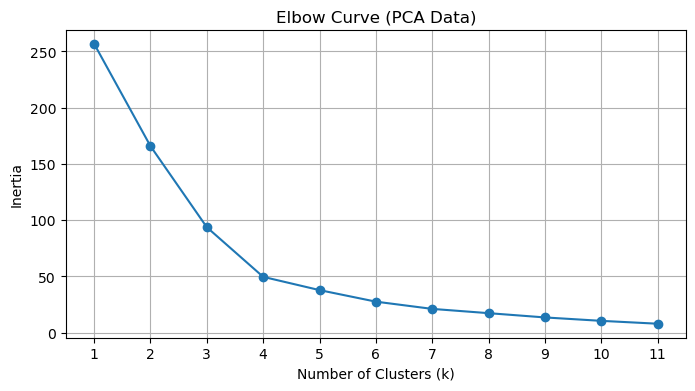

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow_pca['k'])  # Ensures all k values are labeled on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Again the elbow occurs around 4 so the best k value should be 4. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It didn't differ from the best k value found using the original data, both original data and pca data best k value is 4. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [68]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)


In [69]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [70]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(pca_clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [71]:
# Create a copy of the DataFrame with the PCA data
df_pca_clustered = df_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_pca_clustered['Cluster'] = pca_clusters


# Display sample data
(df_pca_clustered.head())


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [72]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',  # Color the points based on the cluster
    hover_cols=['coin_id'],  # Add the crypto name to hover_cols
    title='Cryptocurrency Clusters (PCA Data)',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    height=500,
    width=700
)
scatter_plot_pca



:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

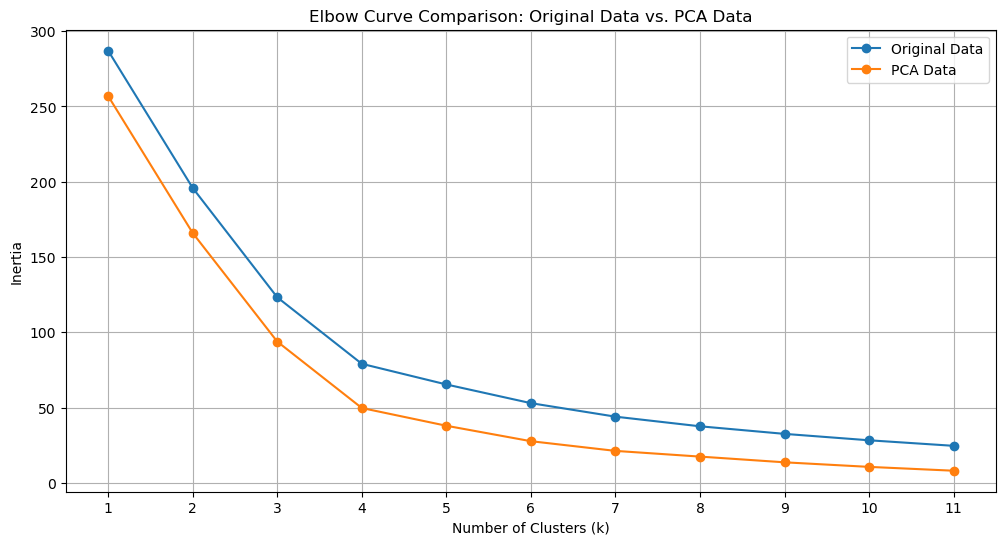

In [37]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', label='Original Data')

plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', label='PCA Data')

plt.title('Elbow Curve Comparison: Original Data vs. PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensures all k values are labeled on the x-axis
plt.grid(True)

plt.legend()

plt.show()

In [73]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
scatter_plot_original = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (Original Data)',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    height=400,
    width=600
)

scatter_plot_pca = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA Data)',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    height=400,
    width=600
)

composite_plot = scatter_plot_original + scatter_plot_pca

composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After visually analyzing the cluster analysis results, in the original data clusters apper to be more dispersed with a larger spread across the plot but in the PCA plot, clusters seem to be more concentrated around PCA components. 

PCA simplifies the dataset by reducing the number of features, making the clustering process computationally more efficient.
The elbow curve shows that using PCA data results in lower inertia values.
Using PCA to reduce features for K-Means clustering can simplify the model while retaining the general cluster structure. However, it may lead to some loss of fine-grained detail, potentially impacting the interpretation of specific clusters. The choice to use PCA should depend on the balance between computational efficiency and the need for detailed analysis.